# B2C Traffic and GMV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import datetime

In [2]:
traffic=pd.read_excel('b2c_traffic.xlsx')
traffic.head()

,User Type,Month of Year,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Transactions,Revenue,Ecommerce Conversion Rate
0,New Visitor,June 2021,99863,100912,100912,0.717695,1.840029,59.328603,35,30714.13,0.000347
1,Returning Visitor,June 2021,28462,0,47813,0.673478,2.783783,164.356932,102,127142.56,0.002133
2,New Visitor,May 2021,105652,106445,106445,0.686317,1.963784,65.279919,50,52826.74,0.000470
3,Returning Visitor,May 2021,27986,0,47502,0.652499,3.250179,178.564439,118,125106.59,0.002484
4,New Visitor,April 2021,112169,112361,112361,0.693524,1.980554,68.360517,62,58202.78,0.000552


In [3]:
orders=pd.read_csv('june20_21_orders.csv')
orders['Created At']=pd.to_datetime(orders['Created At'])

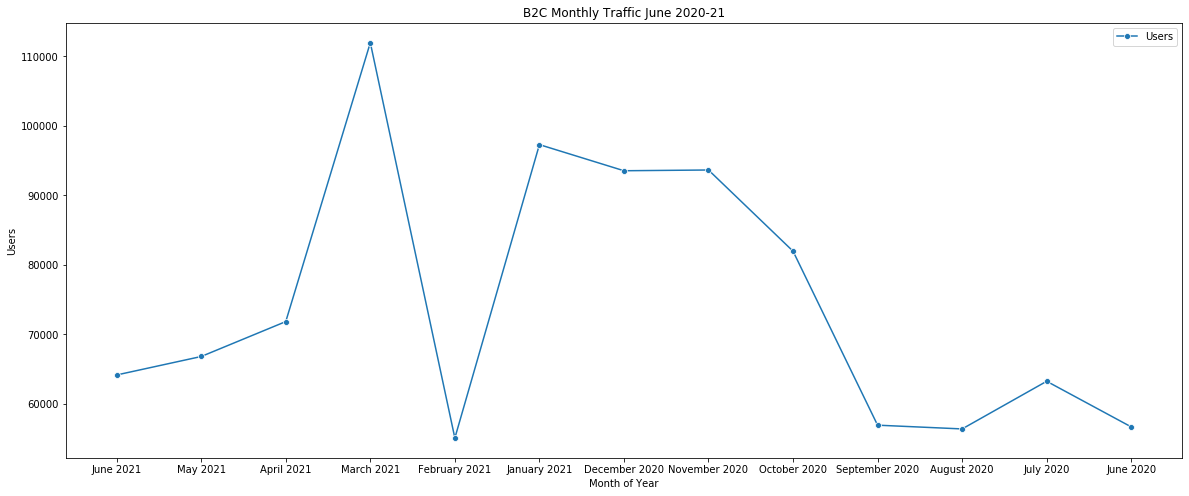

In [4]:
plt.figure(figsize=(20,8))
ax=sns.lineplot(x='Month of Year', y='Users', data=traffic, marker='o', ci=None, label='Users')
plt.title('B2C Monthly Traffic June 2020-21')
plt.show()

In [5]:
gmv=orders.groupby(orders['Created At'])['Subtotal'].sum().reset_index()

gmv['month_year']=gmv['Created At'].dt.strftime('%Y-%m')
gmv

,Created At,Subtotal,month_year
0,2020-06-01 01:53:00,5495.00,2020-06
1,2020-06-01 08:36:00,74.00,2020-06
2,2020-06-01 11:25:00,220.00,2020-06
3,2020-06-01 12:31:00,2056.48,2020-06
4,2020-06-01 13:05:00,837.12,2020-06
...,...,...,...
3009,2021-06-29 18:15:00,307.75,2021-06
3010,2021-06-30 08:00:00,950.00,2021-06
3011,2021-06-30 11:37:00,256.00,2021-06
3012,2021-06-30 15:04:00,288.00,2021-06


In [30]:
june=gmv[gmv['month_year']=='2020-06']

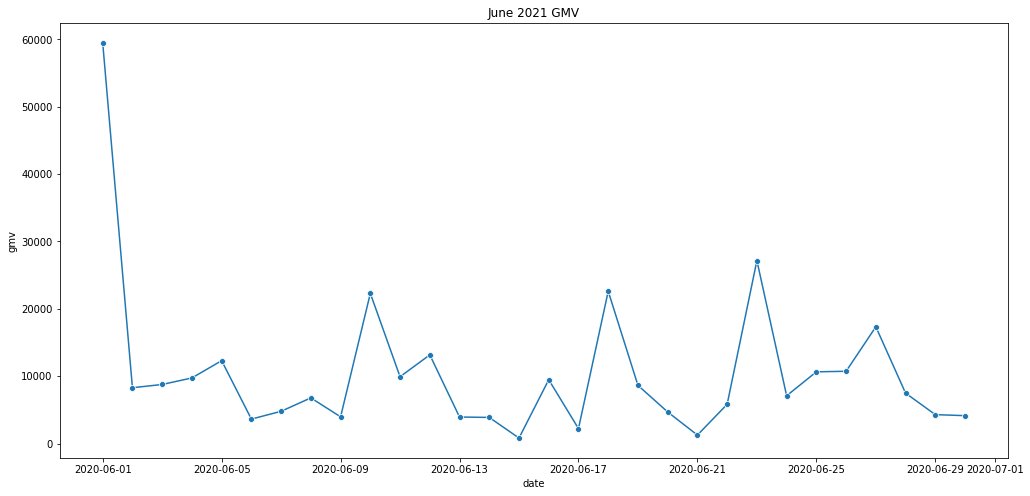

In [38]:
plt.figure(figsize=(17,8))
sns.lineplot(x=june['Created At'].dt.date.unique(), y=june.groupby(june['Created At'].dt.date)['Subtotal'].sum(),
            marker='o')
plt.title('June 2021 GMV')
plt.xlabel('date')
plt.ylabel('gmv')
plt.show()

In [6]:
orders.columns

Index(['Order ID', 'Reference', 'Buyer ID', 'Seller ID', 'Item ID',
       'Markdown ID', 'Buyer', 'Buyer Email', 'Seller', 'Seller Email', 'Item',
       'Item Creation', 'Color', 'Brand', 'Category', 'Parent Category',
       'Subtotal', 'Shipping', 'Refunded', 'Promo Code', 'Promo Value',
       'Markdown', 'Credit', 'Tax', 'Total', 'Payment Type',
       'Credit Card (Stripe) ID', 'Paypal Transaction ID', 'Affirm Charge ID',
       'Seller Fee', 'Seller Label', 'Seller Shipping', 'Seller Refunded',
       'Seller Cashout', 'Seller Promo', 'Billing Name', 'Billing Line 1',
       'Billing Line 2', 'Billing City', 'Billing Region', 'Billing Postcode',
       'Billing Country', 'Buyer Shipping Name', 'Buyer Shipping Line 1',
       'Buyer Shipping Line 2', 'Buyer Shipping City', 'Buyer Shipping Region',
       'Buyer Shipping Postcode', 'Buyer Shipping Country', 'Phone',
       'Seller Shipping Name', 'Seller Shipping Line 1',
       'Seller Shipping Line 2', 'Seller Shipping City',
 

In [7]:
orders['Parent Category'].value_counts()/len(orders)*100

Handbags       56.506148
Accessories    15.445697
Shoes          11.629098
Clothing        7.248975
Jewelry         4.969262
Women           2.817623
Bags            1.255123
Men             0.128074
Name: Parent Category, dtype: float64

In [8]:
month=gmv.groupby('month_year')

In [9]:
month['Subtotal'].count()

month_year
2020-06    267
2020-07    254
2020-08    258
2020-09    199
2020-10    228
2020-11    309
2020-12    325
2021-01    242
2021-02    169
2021-03    230
2021-04    220
2021-05    181
2021-06    132
Name: Subtotal, dtype: int64

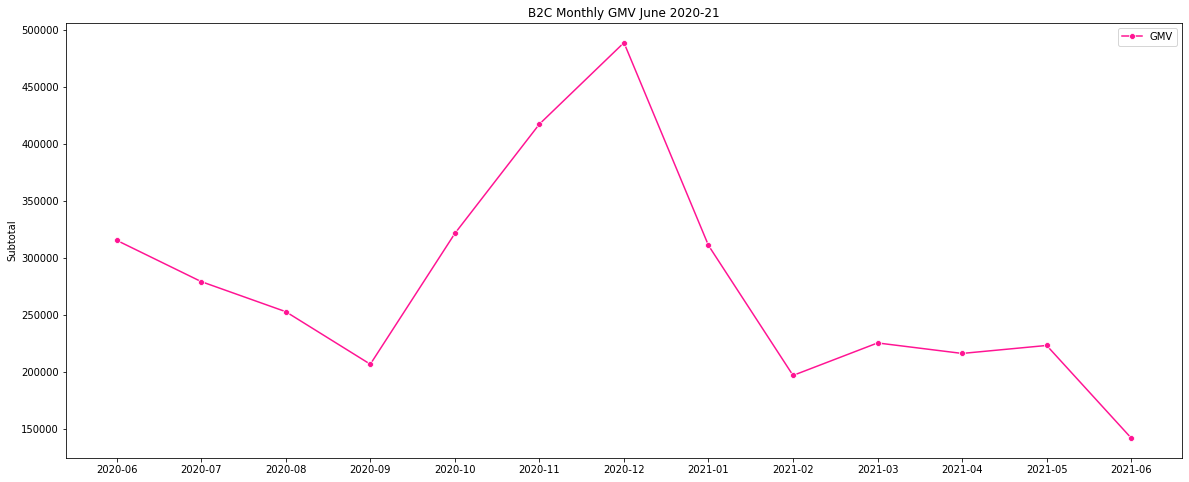

In [10]:
plt.figure(figsize=(20,8))
ax=sns.lineplot(x=gmv['month_year'].unique(), y=month['Subtotal'].sum(), marker='o', color='deeppink',
               label='GMV')
plt.title('B2C Monthly GMV June 2020-21')
plt.show()

In [11]:
expenses=pd.read_excel('b2c_expenses.xlsx')

In [12]:
expenses

,expense,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06
0,PR Expense,0.00,0.00,0.0,5000.00,5000.00,5000.00,5000.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Credit Expense,3224.00,2781.00,3000.0,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00
2,Facebook Ads,1191.00,1362.00,416.0,672.00,1455.00,1724.00,2656.00,1696.51,2399.62,1302.88,1592.90,2770.64,1045.52
3,Google Ads,1000.00,912.00,1000.0,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,500.00
4,Marketing Material,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,Other Miscellaneous Expense,194.00,300.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,Promo Expense,5045.00,9358.00,5000.0,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
7,Re-targeting Expense (Criteo),2706.88,1395.48,1372.7,794.15,603.88,598.97,620.47,589.38,543.68,630.61,569.71,602.95,601.99
8,Giveaway Expense,1000.00,1000.00,1000.0,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
9,Influencer Program,0.00,8574.00,7500.0,2000.00,10040.00,22020.00,10020.00,0.00,0.00,0.00,7780.00,305.00,40.00


In [13]:
cols=list(expenses.columns)
cols=cols[1:]

In [14]:
dict={}
for m in cols:
    dict[m]=expenses[m].sum()

spent=pd.DataFrame.from_dict(dict, orient='index').reset_index().rename(columns={'index': 'month', 0:'total'})

In [15]:
new=expenses.transpose().reset_index()
new=new.rename(columns=new.iloc[0])
new=new.drop(0)
new

,expense,PR Expense,Credit Expense,Facebook Ads,Google Ads,Marketing Material,Other Miscellaneous Expense,Promo Expense,Re-targeting Expense (Criteo),Giveaway Expense,Influencer Program,Ring Central
1,2020-06,0,3224,1191,1000,0,194,5045,2706.88,1000,0,0
2,2020-07,0,2781,1362,912,0,300,9358,1395.48,1000,8574,0
3,2020-08,0,3000,416,1000,0,0,5000,1372.7,1000,7500,0
4,2020-09,5000,3000,672,1000,0,0,5000,794.15,1000,2000,0
5,2020-10,5000,3000,1455,1000,0,0,5000,603.88,1000,10040,0
6,2020-11,5000,3000,1724,1000,0,0,5000,598.97,1000,22020,0
7,2020-12,5000,3000,2656,1000,0,0,5000,620.47,1000,10020,0
8,2021-01,0,3000,1696.51,1000,0,0,5000,589.38,1000,0,0
9,2021-02,0,3000,2399.62,1000,0,0,5000,543.68,1000,0,0
10,2021-03,0,3000,1302.88,1000,0,0,5000,630.61,1000,0,0


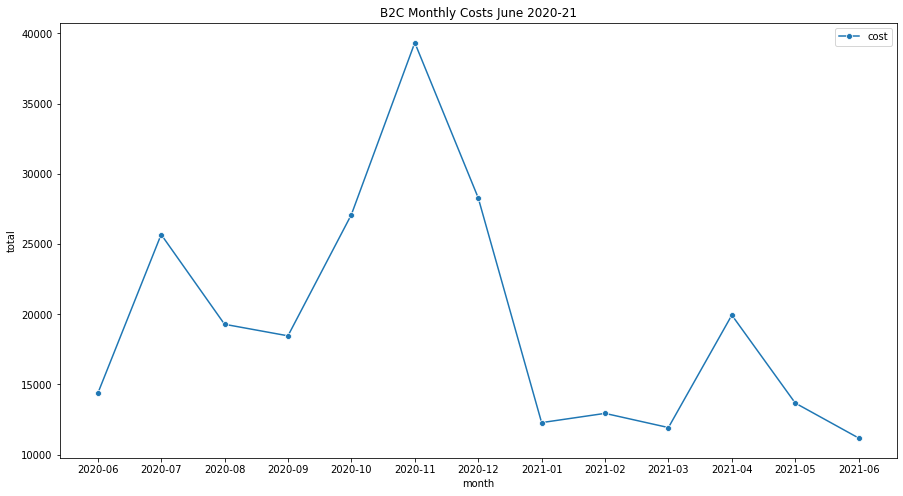

In [16]:
plt.figure(figsize=(15,8))
sns.lineplot(x='month', y='total', data=spent, marker='o', label='cost')
plt.title('B2C Monthly Costs June 2020-21')
plt.xlabel('month')
plt.show()

In [17]:
merge=spent.merge(month['Subtotal'].sum().reset_index(), left_on='month', right_on='month_year', how='outer')

In [18]:
merge

,month,total,month_year,Subtotal
0,2020-06,14360.88,2020-06,315311.28
1,2020-07,25682.48,2020-07,279119.01
2,2020-08,19288.70,2020-08,252758.44
3,2020-09,18466.15,2020-09,206701.60
4,2020-10,27098.88,2020-10,321325.12
5,2020-11,39342.97,2020-11,417163.23
6,2020-12,28296.47,2020-12,488525.85
7,2021-01,12285.89,2021-01,310790.34
8,2021-02,12943.30,2021-02,196895.56
9,2021-03,11933.49,2021-03,225364.99


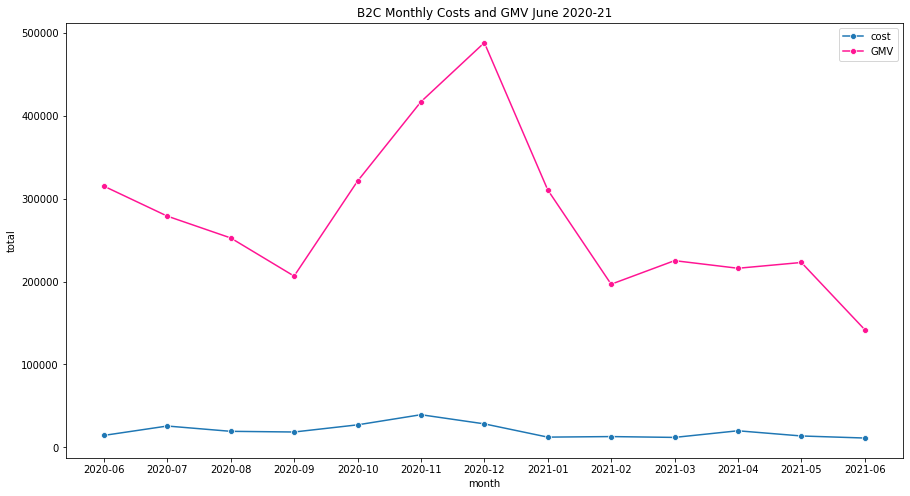

In [19]:
plt.figure(figsize=(15,8))
sns.lineplot(x='month', y='total', data=merge, marker='o', label='cost')
sns.lineplot(x='month', y='Subtotal', data=merge, marker='o', color='deeppink',
               label='GMV')
plt.title('B2C Monthly Costs and GMV June 2020-21')
plt.xlabel('month')
plt.show()

In [20]:
orders.columns

Index(['Order ID', 'Reference', 'Buyer ID', 'Seller ID', 'Item ID',
       'Markdown ID', 'Buyer', 'Buyer Email', 'Seller', 'Seller Email', 'Item',
       'Item Creation', 'Color', 'Brand', 'Category', 'Parent Category',
       'Subtotal', 'Shipping', 'Refunded', 'Promo Code', 'Promo Value',
       'Markdown', 'Credit', 'Tax', 'Total', 'Payment Type',
       'Credit Card (Stripe) ID', 'Paypal Transaction ID', 'Affirm Charge ID',
       'Seller Fee', 'Seller Label', 'Seller Shipping', 'Seller Refunded',
       'Seller Cashout', 'Seller Promo', 'Billing Name', 'Billing Line 1',
       'Billing Line 2', 'Billing City', 'Billing Region', 'Billing Postcode',
       'Billing Country', 'Buyer Shipping Name', 'Buyer Shipping Line 1',
       'Buyer Shipping Line 2', 'Buyer Shipping City', 'Buyer Shipping Region',
       'Buyer Shipping Postcode', 'Buyer Shipping Country', 'Phone',
       'Seller Shipping Name', 'Seller Shipping Line 1',
       'Seller Shipping Line 2', 'Seller Shipping City',
 

In [21]:
buy_count=(orders.groupby([orders['Buyer Email'], orders['Created At'].dt.date])['Total']
           .value_counts()
           .rename('count')
          .reset_index())

In [22]:
new_count=buy_count['Buyer Email'].value_counts().reset_index()
len(new_count[new_count['Buyer Email']>1])

521

In [23]:
521/len(new_count)

0.2425512104283054

In [24]:
ads=pd.read_excel('b2c_ads.xlsx')

In [25]:
ads.sort_values(by='Impressions', ascending=False)

,Ad Name,Ad Set Name,Ad Delivery,Reach,Impressions,Frequency,Result Type,Results,Cost per Result,Amount Spent (USD),Starts,Ends,"CPM (Cost per 1,000 Impressions)",Link Clicks,CPC (Cost per Link Click),CTR (Link Click-Through Rate),Reporting Starts,Reporting Ends
1,US - 25+ Evergreen: LePrix10,US - 25+ Evergreen LePrix Branding,active,1139742,2763880,2.425005,Landing Page Views,86986.0,0.052218,4542.21,2020-10-02,Ongoing,1.643418,107591.0,0.042217,3.892752,2020-06-01,2021-07-01
11,US - 25+ Lunar New Year (English),US - 25+ Lunar New Year Sale - Asia,not_delivering,549374,902998,1.643685,Landing Page Views,5148.0,0.065144,335.36,2021-02-10,2021-02-16,0.371385,11666.0,0.028747,1.291919,2020-06-01,2021-07-01
12,US - 25+ Lunar New Year (English),US - 25+ Lunar New Year Sale - Top US Cities W...,not_delivering,548350,898177,1.637963,Landing Page Views,5326.0,0.062967,335.36,2021-02-10,2021-02-16,0.373379,12060.0,0.027808,1.342720,2020-06-01,2021-07-01
0,Retargeting,Retargeting - Nov (Viewed or Added to Cart But...,active,21700,241939,11.149263,Website Purchases,54.0,88.380370,4772.54,2020-11-25,Ongoing,19.726212,11992.0,0.397977,4.956621,2020-06-01,2021-07-01
7,US - 25+ Evergreen: BF Preview Sale,US - 25+ Evergreen LePrix Branding,not_delivering,143838,226154,1.572283,Landing Page Views,6424.0,0.064502,414.36,2020-11-17,Ongoing,1.832203,8112.0,0.051080,3.586936,2020-06-01,2021-07-01
3,US - 25+ Evergreen: Brigette,US - 25+ Evergreen LePrix - Brigette Video,active,124458,184042,1.478748,Landing Page Views,10490.0,0.062910,659.93,2021-05-13,Ongoing,3.585758,12662.0,0.052119,6.879951,2020-06-01,2021-07-01
4,US - 25+ Evergreen: LePrix10,US - 25+ Evergreen LePrix10 Promo,not_delivering,55328,95520,1.726431,Website Purchases,14.0,33.776429,472.87,2020-07-22,2020-09-01,4.950482,1705.0,0.277343,1.784966,2020-06-01,2021-07-01
2,Retargeting,Retargeting - March (Viewed or Added to Cart B...,archived,11732,86473,7.370696,Website Purchases,48.0,21.708958,1042.03,2020-03-26,Ongoing,12.050351,3130.0,0.332917,3.619627,2020-06-01,2021-07-01
18,US - 25+ Treat Yo Self Sale,US - 25+ Treat Yo Self Sale,archived,55440,76698,1.383442,Landing Page Views,3422.0,0.077221,264.25,2020-12-16,Ongoing,3.445331,4065.0,0.065006,5.300008,2020-06-01,2021-07-01
32,US - 25+ Lunar New Year (Chinese),US - 25+ Lunar New Year Sale - Chinese Speaking,not_delivering,41463,70046,1.689362,Landing Page Views,1985.0,0.067577,134.14,2021-02-10,2021-02-16,1.915027,3782.0,0.035468,5.399309,2020-06-01,2021-07-01


In [42]:
orders_2020=pd.read_csv('2020orders.csv')
orders_2020['Created At']=pd.to_datetime(orders_2020['Created At'])

In [43]:
gmv20=orders_2020.groupby(orders_2020['Created At'])['Subtotal'].sum().reset_index()

gmv20['month_year']=gmv20['Created At'].dt.strftime('%Y-%m')
gmv20

,Created At,Subtotal,month_year
0,2020-01-01 12:44:00,1595.00,2020-01
1,2020-01-01 19:21:00,200.00,2020-01
2,2020-01-01 20:35:00,404.99,2020-01
3,2020-01-02 00:04:00,267.00,2020-01
4,2020-01-02 09:19:00,190.00,2020-01
...,...,...,...
3230,2020-12-31 12:52:00,3115.00,2020-12
3231,2020-12-31 17:36:00,3909.15,2020-12
3232,2020-12-31 21:19:00,252.20,2020-12
3233,2020-12-31 22:24:00,410.00,2020-12


In [44]:
month20=gmv20.groupby('month_year')

In [52]:
gmv21=gmv[gmv['month_year'].str.contains('2021')]
month21=gmv21.groupby('month_year')

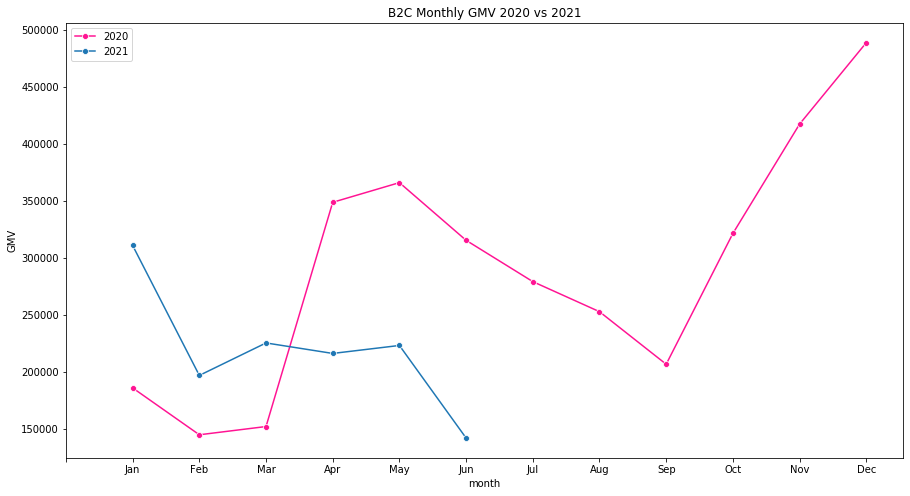

In [64]:
plt.figure(figsize=(15,8))
ax1=sns.lineplot(x=gmv20['Created At'].dt.month.unique(), y=month20['Subtotal'].sum(), marker='o', color='deeppink',
               label='2020')
ax2=sns.lineplot(x=gmv21['Created At'].dt.month.unique(), y=month21['Subtotal'].sum(), marker='o',
               label='2021')
ax1.set_xticks(range(0,13))
ax1.set_xticklabels(['', 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('B2C Monthly GMV 2020 vs 2021')
plt.xlabel('month')
plt.ylabel('GMV')
plt.show()

In [81]:
sep20=orders_2020[orders_2020['Created At'].dt.month==9]
sep20.groupby('Promo Code')['Subtotal'].sum()

Promo Code
HERES30        69605.00
LEPRIX10       46950.93
Leprixhonor      400.00
SEP15           4199.00
SEP20          18337.97
SEP2020         2436.50
THANKYOU        6409.00
Name: Subtotal, dtype: float64

In [83]:
aug20=orders_2020[orders_2020['Created At'].dt.month==8]
aug20.groupby('Promo Code')['Subtotal'].sum()

Promo Code
AMELANE50      999.00
DREAM         3633.75
DREAMBAG     49917.59
LEPRIX10     81457.24
Name: Subtotal, dtype: float64

In [75]:
count=sep20.groupby([sep20['Created At'].dt.date, sep20['Buyer']])['Total'].count().reset_index()
count['Created At']=pd.to_datetime(count['Created At'])
count['Total'].sum()

230

In [76]:
count_a=aug20.groupby([aug20['Created At'].dt.date, aug20['Buyer']])['Total'].count().reset_index()
count_a['Created At']=pd.to_datetime(count_a['Created At'])
count_a['Total'].sum()

360

In [78]:
full=aug20.groupby([aug20['Created At'].dt.date, aug20['Buyer']])['Total'].sum().reset_index()
full['Created At']=pd.to_datetime(full['Created At'])
full.groupby(full['Created At'].dt.month)['Total'].mean()

Created At
8    1007.482936
Name: Total, dtype: float64